<a href="https://colab.research.google.com/github/Icee21/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
filename = '/content/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


How many rows and columns?

In [4]:
len(df)

print(f'Total rows {len(df)}')

Total rows 8523


In [5]:
len(df.columns)

print(f'Total columns {len(df.columns)}')

Total columns 12


What are the datatypes of each variable?

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                7060 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                6113 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

Are there duplicates? If so, drop any duplicates

In [9]:
df.duplicated().any()

False

In [10]:
df.duplicated().sum()

0

Identify missing values.

In [11]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
iw_mean = df['Item_Weight'].mean()

In [13]:
# I filled in the missing value of "Item Weight" by using the average value of that column
df['Item_Weight'] = df['Item_Weight'].fillna(iw_mean)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1970-01-01 00:00:00.000001987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1970-01-01 00:00:00.000001985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,1970-01-01 00:00:00.000002002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,1970-01-01 00:00:00.000002007,NaN,Tier 2,Supermarket Type1,4710.5350


In [14]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
# for the value "Outlet Size" I used the "High" value because it had the lowest number result than "Small" and "Medium" having high number result, that's why I used "High" value to make the result closer to others.
df['Outlet_Size']=df['Outlet_Size'].fillna('High')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1970-01-01 00:00:00.000001998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df['Outlet_Size'].value_counts()

High      3342
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64

Confirm that there are no missing values after addressing them

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                8523 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                8523 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

In [18]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


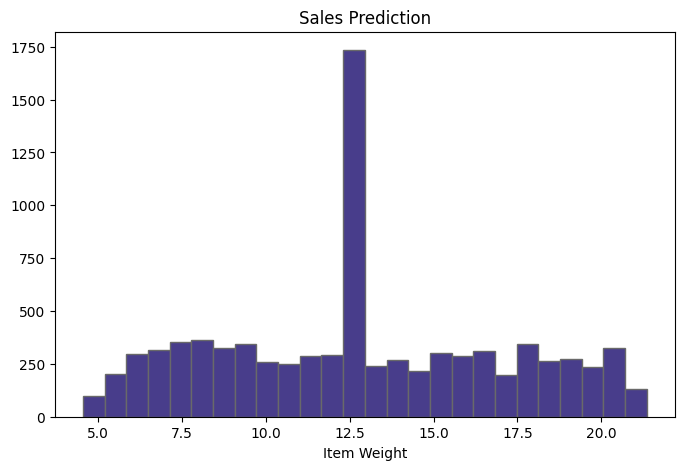

In [24]:
item_1 = df['Item_Weight']
item_1_mean = df['Item_Weight'].mean()
plt.figure(figsize = (8,5))
plt.hist(item_1, bins = 'auto', edgecolor = 'dimgrey',  color = 'darkslateblue')
plt.xlabel('Item Weight')
plt.title('Sales Prediction');

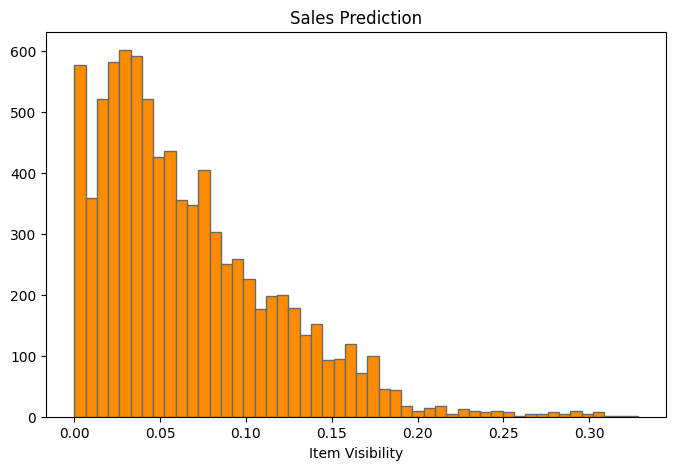

In [25]:
item_2 = df['Item_Visibility']
plt.figure(figsize = (8,5))
plt.hist(item_2, bins = 'auto', edgecolor = 'dimgrey',  color = 'darkorange')
plt.xlabel('Item Visibility')
plt.title('Sales Prediction');

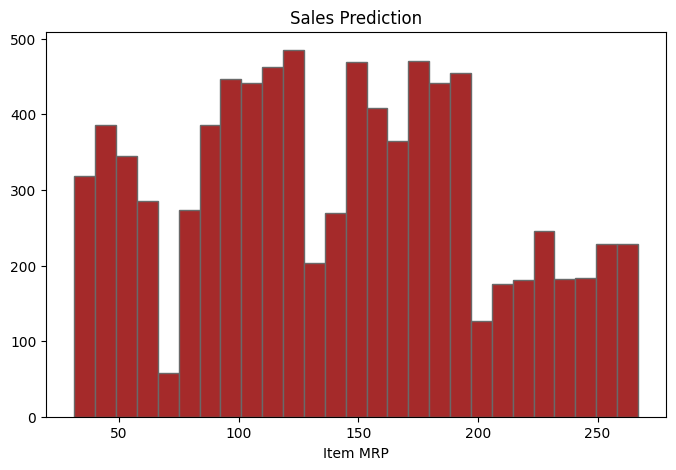

In [26]:
item_3 = df['Item_MRP']
plt.figure(figsize = (8,5))
plt.hist(item_3, bins = 'auto', edgecolor = 'dimgrey',  color = 'brown')
plt.xlabel('Item MRP')
plt.title('Sales Prediction');

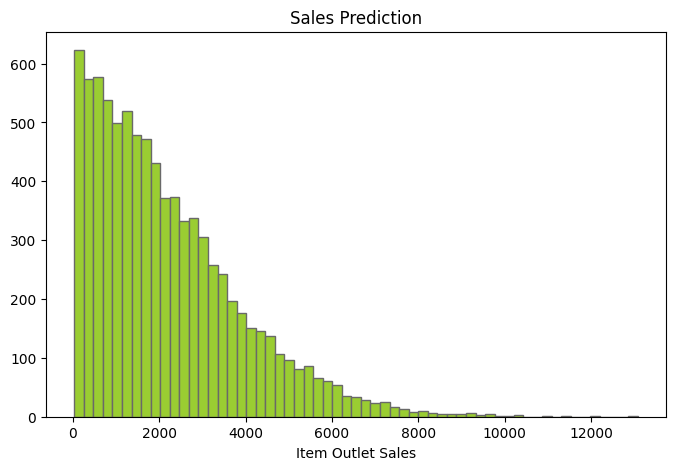

In [27]:
item_4 = df['Item_Outlet_Sales']
plt.figure(figsize = (8,5))
plt.hist(item_4, bins = 'auto', edgecolor = 'dimgrey',  color = 'yellowgreen')
plt.xlabel('Item Outlet Sales')
plt.title('Sales Prediction');

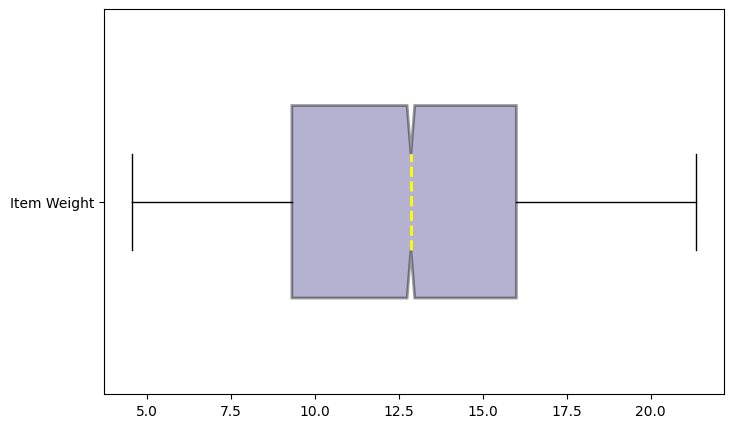

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([item_1],
                        notch = True,
                        labels = ['Item Weight'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='darkslateblue', alpha = .4));

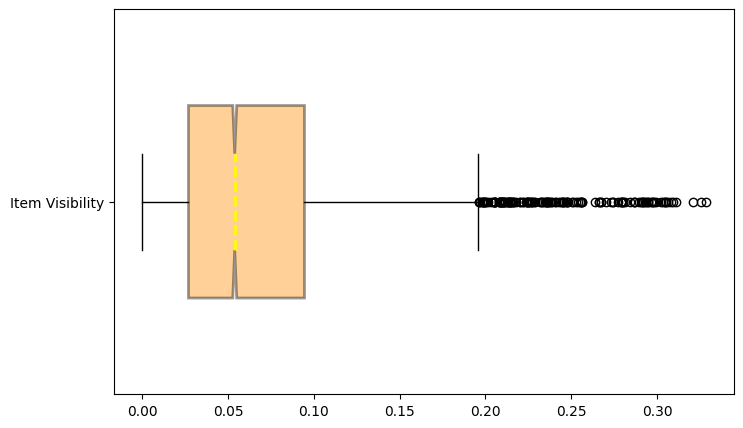

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([item_2],
                        notch = True,
                        labels = ['Item Visibility'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='darkorange', alpha = .4));

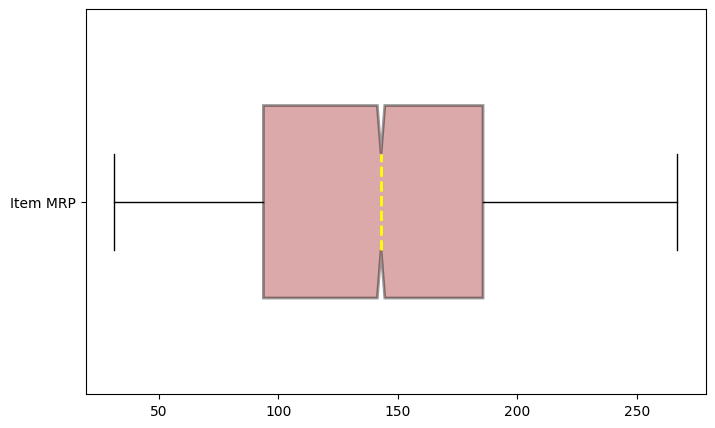

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([item_3],
                        notch = True,
                        labels = ['Item MRP'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='brown', alpha = .4));

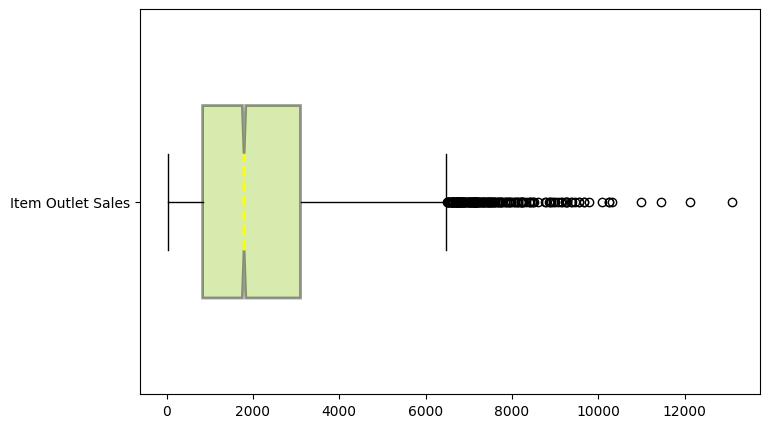

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([item_4],
                        notch = True,
                        labels = ['Item Outlet Sales'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='yellowgreen', alpha = .4));

In [43]:
corr = df.corr()
corr

<ipython-input-43-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


<Axes: >

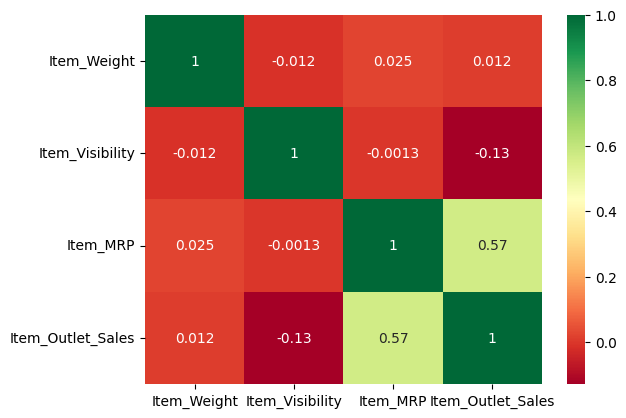

In [45]:
sns.heatmap(corr, cmap = 'RdYlGn', annot = True)